# 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# For reading the stock data from yahoo

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [5]:
# For time stamps
from datetime import datetime


- We will discover and explore data from the stock market, particularly some technology stocks 
(Apple, Amazon, Google, and Microsoft).

In [6]:
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
# Setting up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [8]:
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500,APPLE
2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100,APPLE
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000,APPLE
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900,APPLE
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168777,63135500,APPLE
...,...,...,...,...,...,...,...
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON
2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400,AMAZON
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500,AMAZON


In [10]:
df.shape

(1004, 7)

- Here, we can see that 1004 rows and 7 columns are present in the dataset

# 2. EDA

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,162.308052,164.322844,160.475476,162.441569,162.101485,4.813000e+07
std,71.961239,72.593352,71.379938,72.022693,71.707313,2.766595e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,104.027500,105.751251,103.162498,104.280003,104.280003,2.528615e+07
50%,134.225006,136.285004,132.900002,134.594994,134.334351,4.397390e+07
75%,201.567505,203.774998,199.817497,200.899998,200.499809,6.404150e+07
max,361.750000,366.779999,352.440002,359.489990,359.489990,2.231334e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-08-03 to 2023-08-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


In [13]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [14]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.853507,160.650438,157.288207,159.049442,158.699476,7.024108e+07
std,17.837464,17.614692,18.155243,17.889763,18.032570,2.333970e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.277610e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.579930e+07
75%,171.615005,173.175003,170.879997,171.955002,171.699997,8.109905e+07
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08


In [15]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.648422,107.128705,104.479434,105.800817,105.800817,2.704976e+07
std,12.230495,12.300524,12.259461,12.274496,12.274496,1.110466e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.064670e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.424990e+07
75%,117.419998,119.244999,116.674999,118.130001,118.130001,3.020725e+07
max,133.009995,134.070007,132.130005,133.110001,133.110001,9.779860e+07


In [16]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,274.552470,277.708526,271.635179,274.761275,273.750904,2.919648e+07
std,37.711495,37.808972,37.585962,37.731956,38.229803,1.091456e+07
min,217.550003,220.410004,213.429993,214.250000,212.649246,9.200800e+06
25%,243.160004,245.305000,240.264999,242.514999,241.041595,2.249105e+07
50%,261.690002,266.480011,260.290009,263.100006,261.870209,2.669820e+07
75%,306.429993,308.769989,304.000000,305.485001,304.818649,3.235000e+07
max,361.750000,366.779999,352.440002,359.489990,359.489990,8.610200e+07


In [17]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,110.177809,111.803705,108.499084,110.154741,110.154741,6.603269e+07
std,16.526645,16.628058,16.503224,16.532574,16.532574,2.578589e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.826480e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.051315e+07
50%,105.260002,106.790001,104.330002,105.660004,105.660004,5.910290e+07
75%,125.820000,127.545002,124.410000,126.349998,126.349998,7.259520e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


# 3. Data Visualization

- 3.1 Closing Price: 
- The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

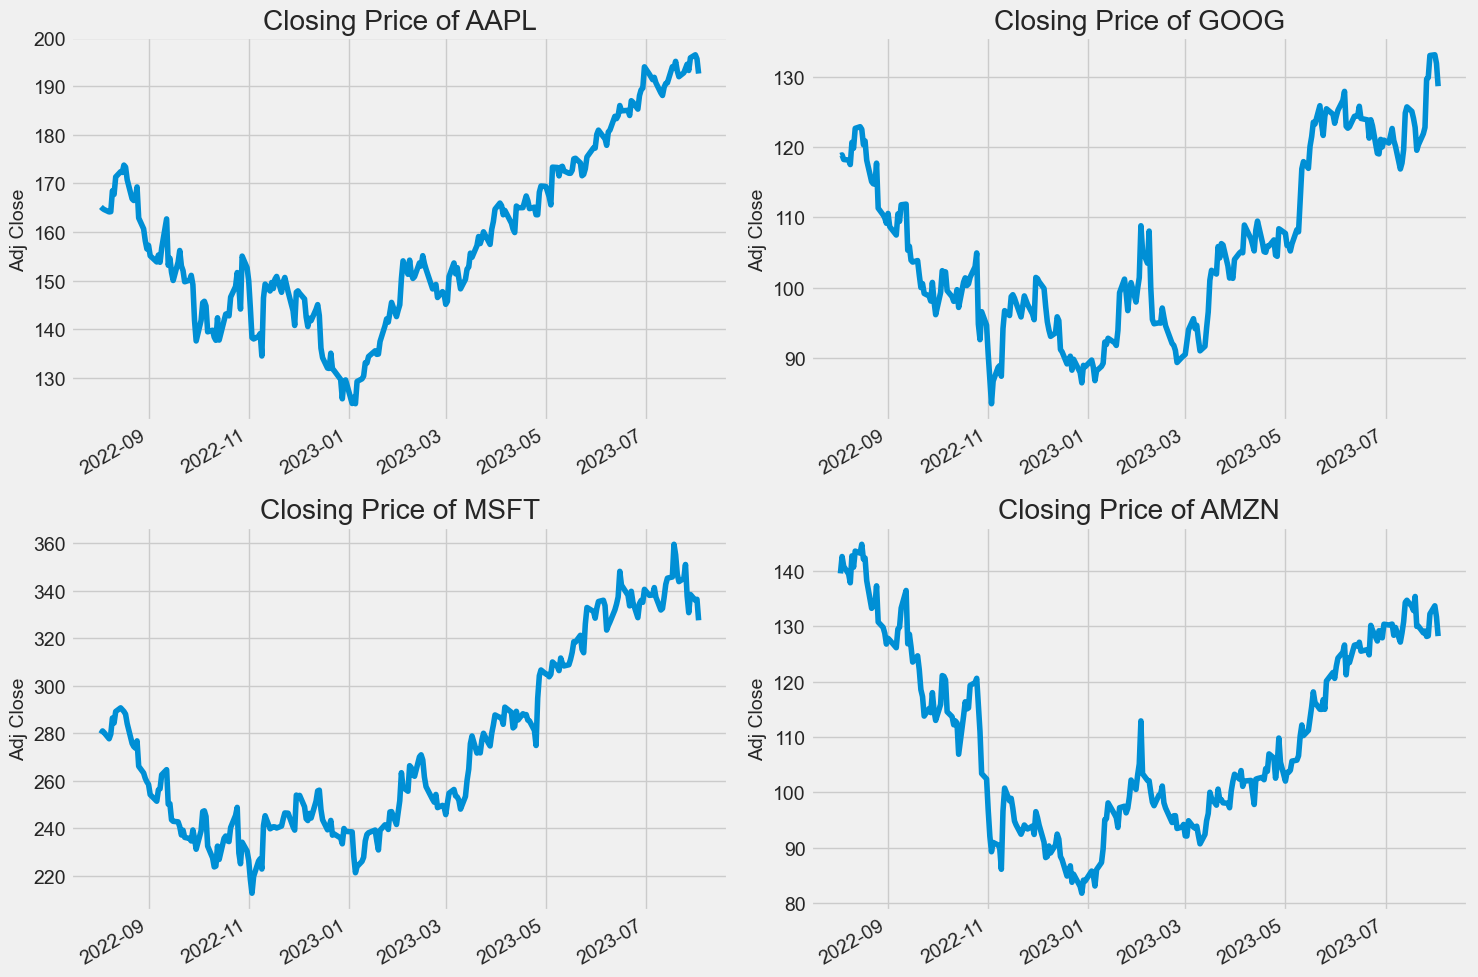

In [18]:
# historical view of the closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

- 3.2 Volume of Sales
- Volume is the amount of an asset or security that changes hands over some period of time, 
  often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security 
  traded between its daily open and close. Trading volume, and changes to volume over the course of time, 
  are important inputs for technical traders.

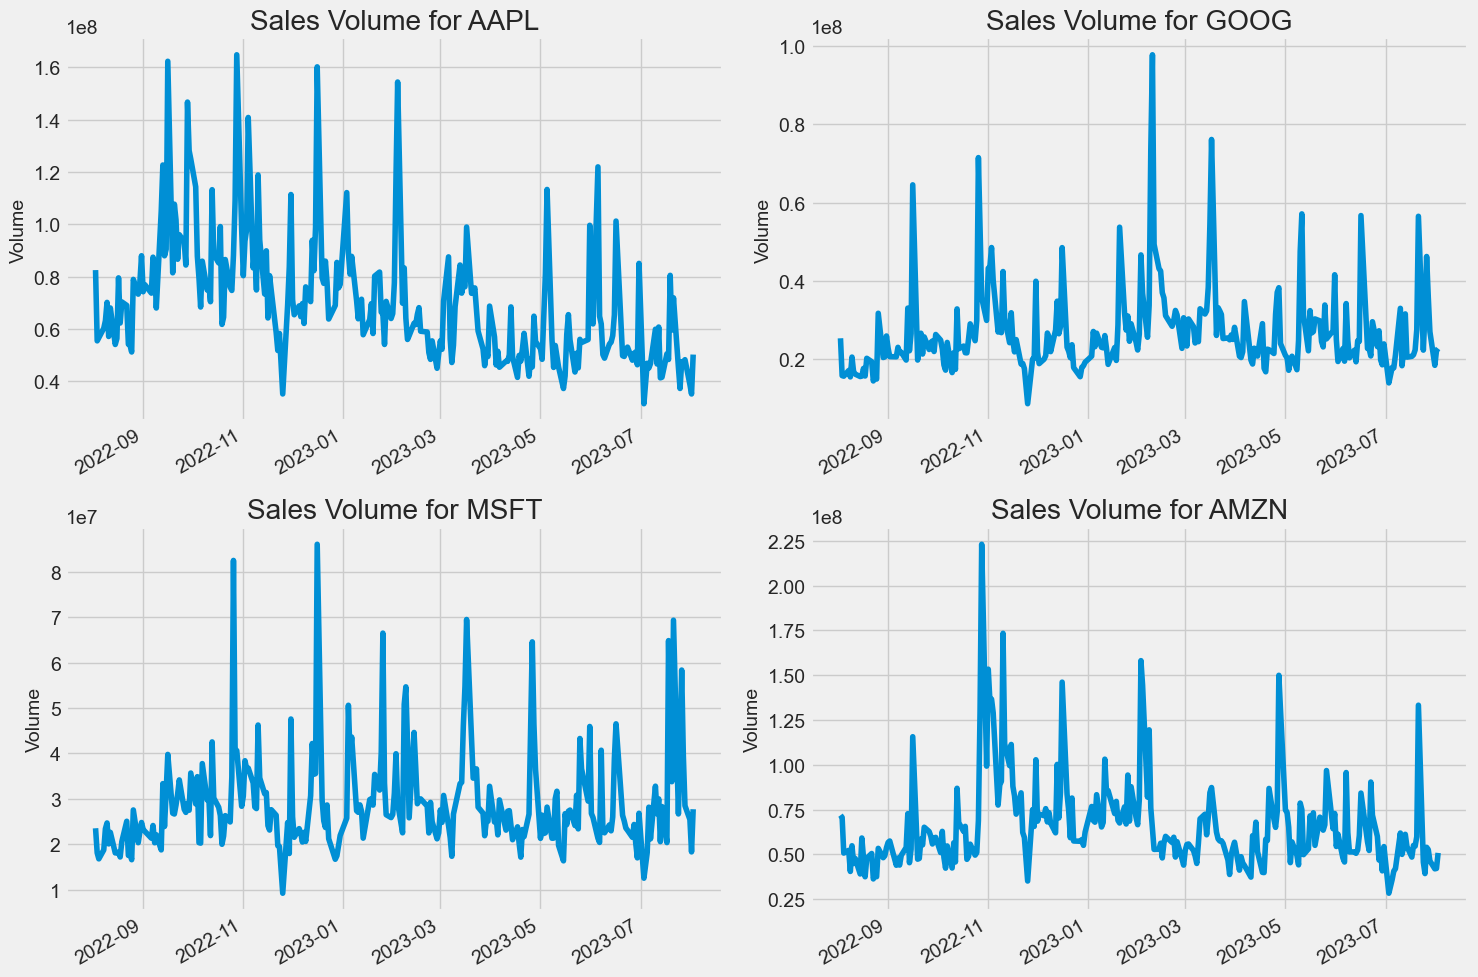

In [19]:
# plotting the total volume of stock being traded each day

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

- 3.3 Moving average of the various stocks
- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated 
  average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period.

In [20]:
pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


- Note: Here, if we do not update the old version of pandas to the new version it will throw an error like 
    "'int' object is not subscriptable"

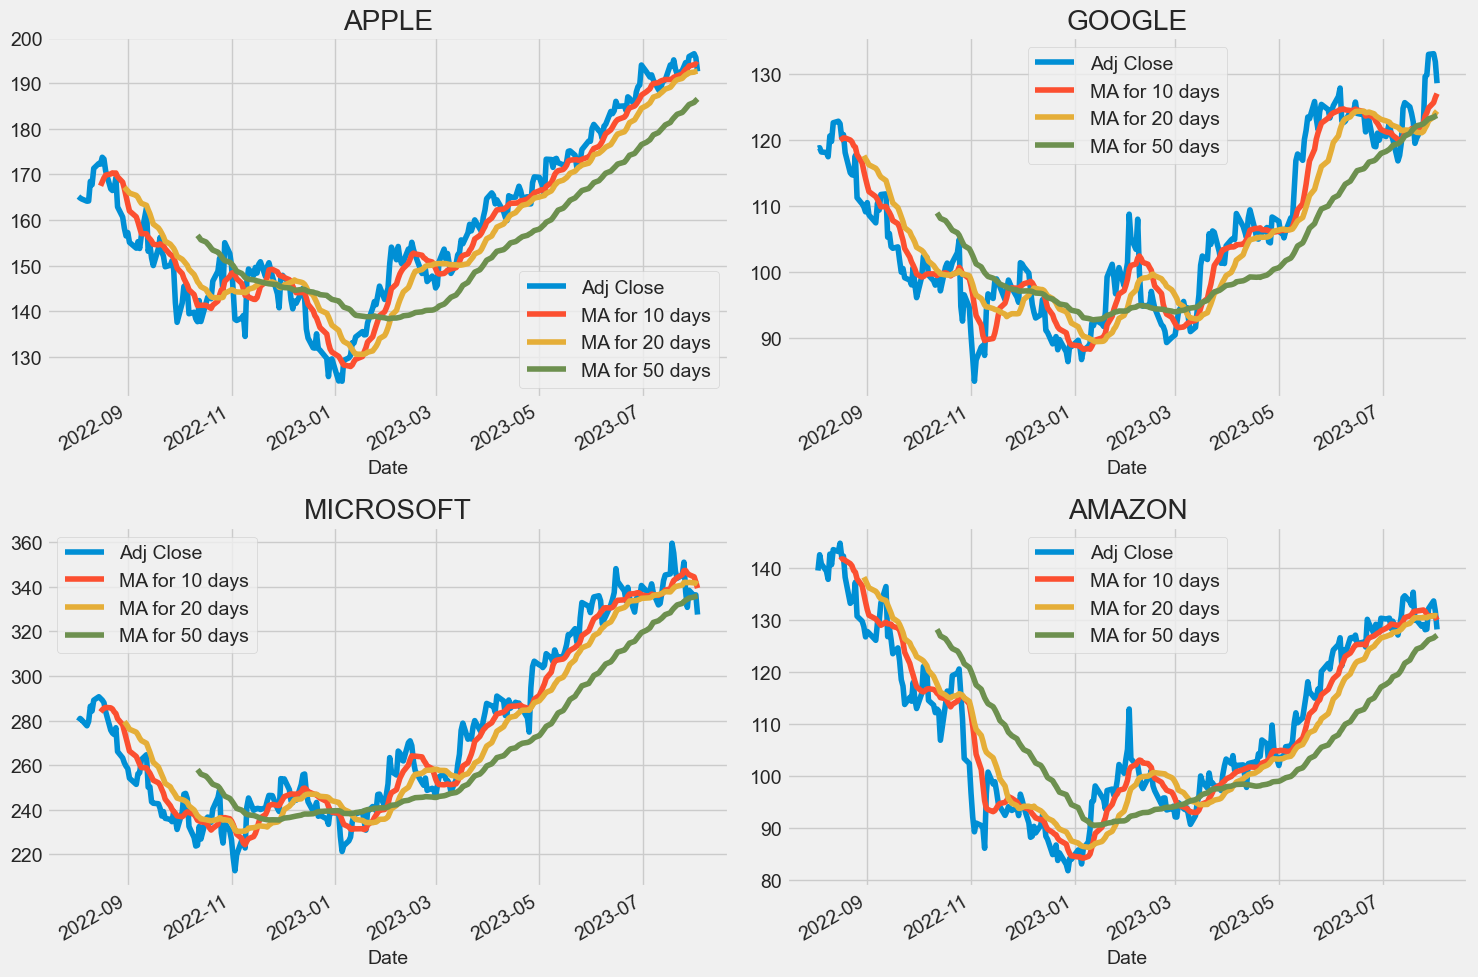

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for %s days" %(str(ma))
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

- 3.4 Daily return of the stock on average
- We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes
  of the stock.

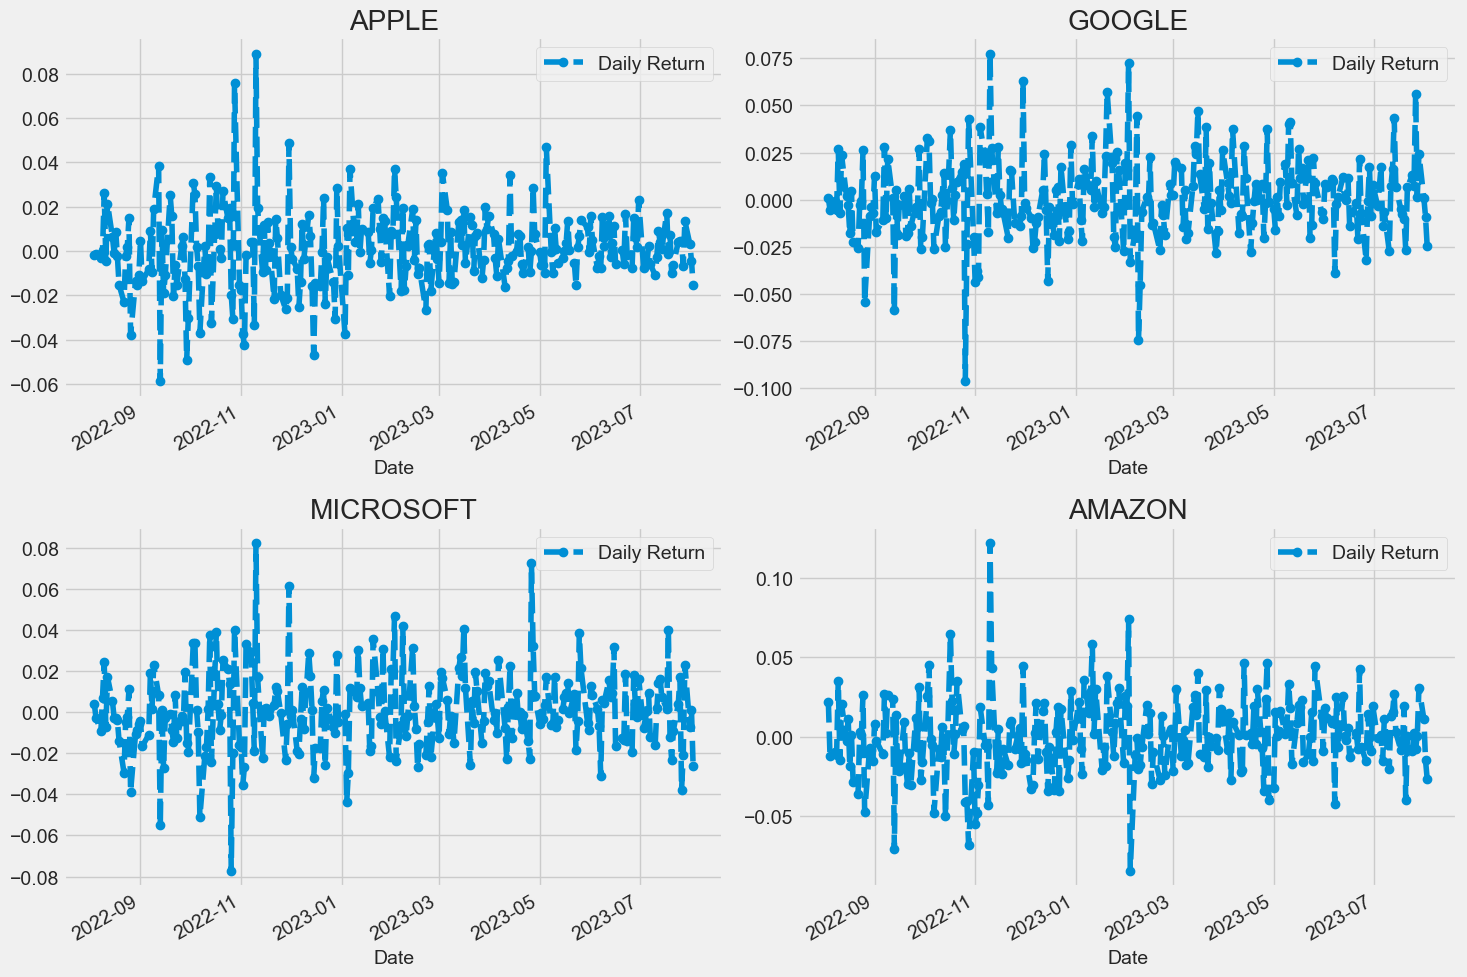

In [22]:
# using pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

- 3.4.1 An overall look at the average daily return using a histogram.

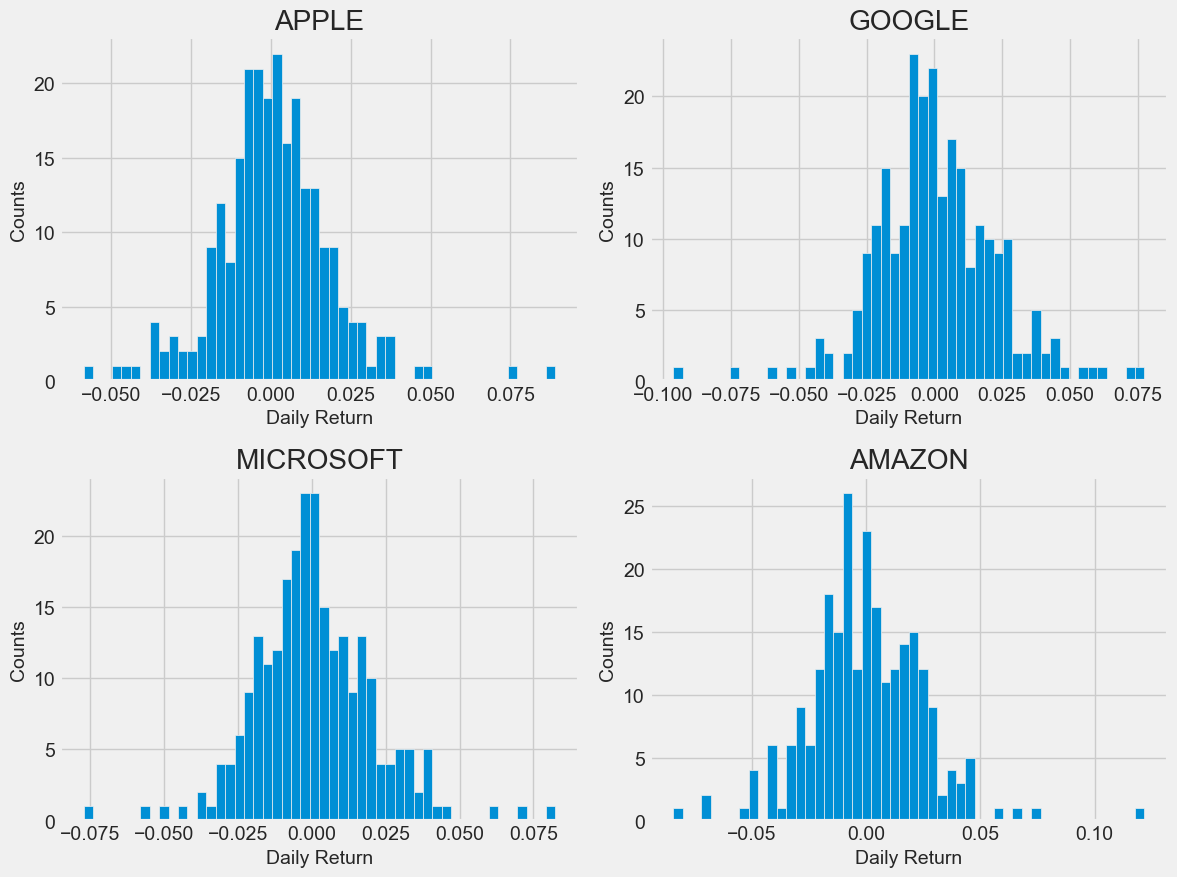

In [23]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

- 3.5 Correlation between different stocks closing prices
- It measures the linear relationship between two continuous variables. The coefficient ranges from -1 to +1, where -1 indicates   a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no linear correlation.

In [24]:
# Collecting all the closing prices for the stock list into one DataFrame

closing_df = pdr.get_data_yahoo(stock_list, start=start, end=end)['Adj Close']

# Making a new stock returns DataFrame
returns = closing_df.pct_change()
returns

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-03,NaN,NaN,NaN,NaN
2022-08-04,-0.001926,0.021861,0.000758,0.004177
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002903,-0.009872,-0.000677,-0.009155
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
...,...,...,...,...
2023-07-27,-0.006581,0.000780,0.001620,-0.020872
2023-07-28,0.013508,0.030877,0.024178,0.023131
2023-07-31,0.003166,0.011119,0.000752,-0.007241


- Now we can compare the daily percentage return of two stocks to check how correlated.
  First let's see a stock compared to itself.

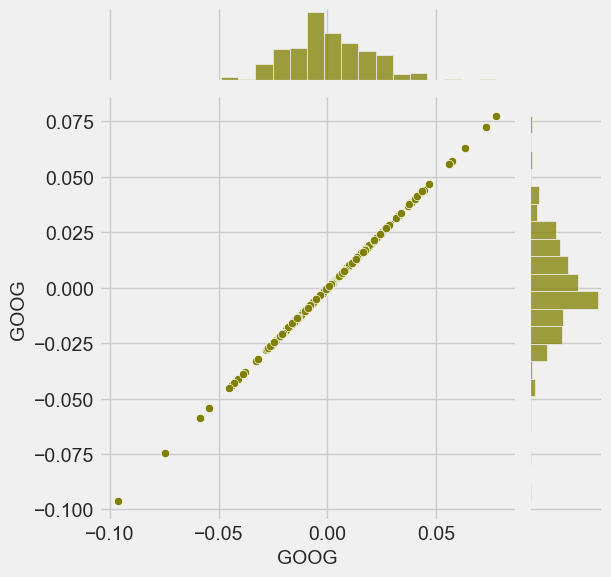

In [25]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=returns, kind='scatter', color='olive')

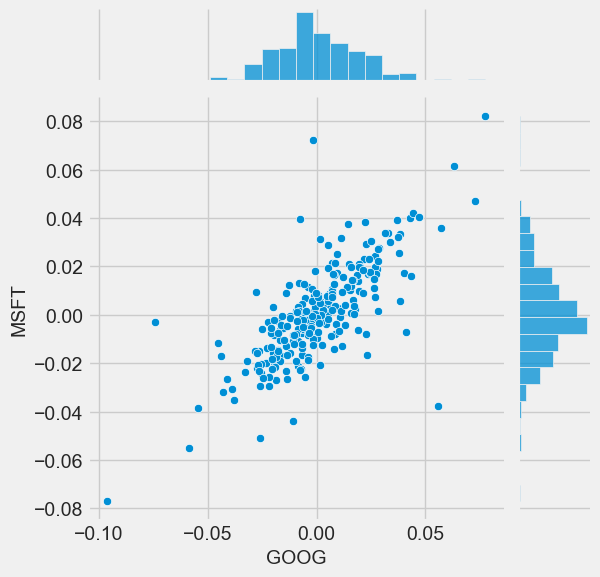

In [26]:
# using joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=returns, kind='scatter')

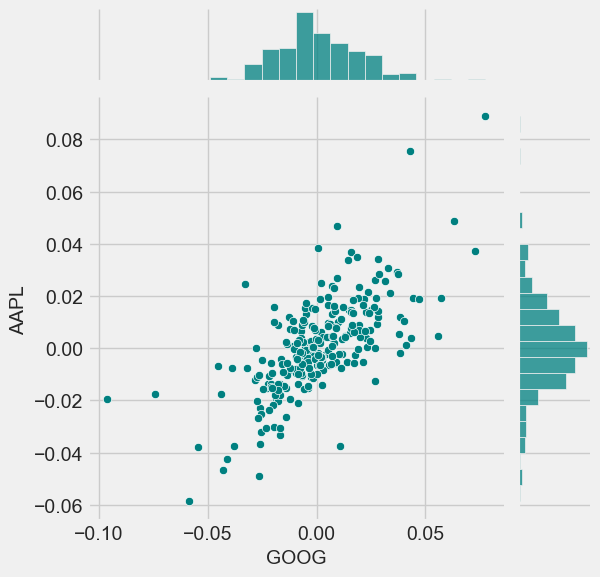

In [27]:
# using joinplot to compare the daily returns of Google and Apple
sns.jointplot(x='GOOG', y='AAPL', data=returns, kind='scatter', color='teal')

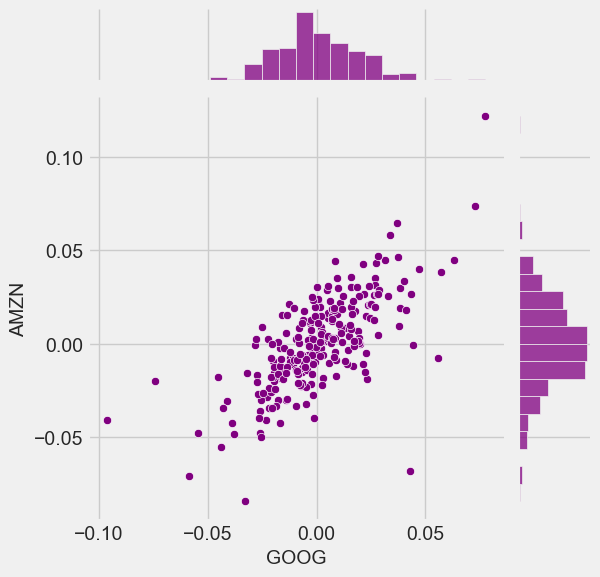

In [28]:
# using joinplot to compare the daily returns of Google and Amazone
sns.jointplot(x='GOOG', y='AMZN', data=returns, kind='scatter', color='purple')

- Like this we can repeat this comparison analysis for every possible combination of stocks using pair plot.

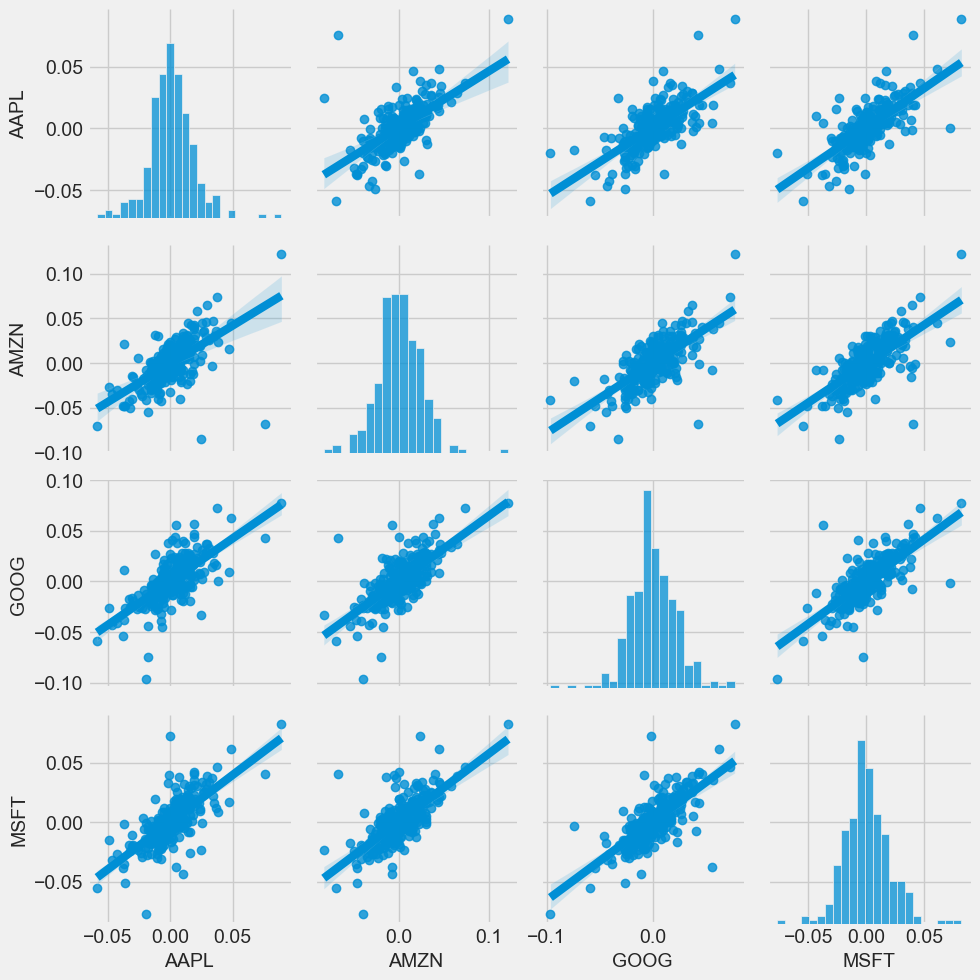

In [29]:
sns.pairplot(returns, kind='reg')

- Above plot represents all the relationships on daily returns between all the stocks. 


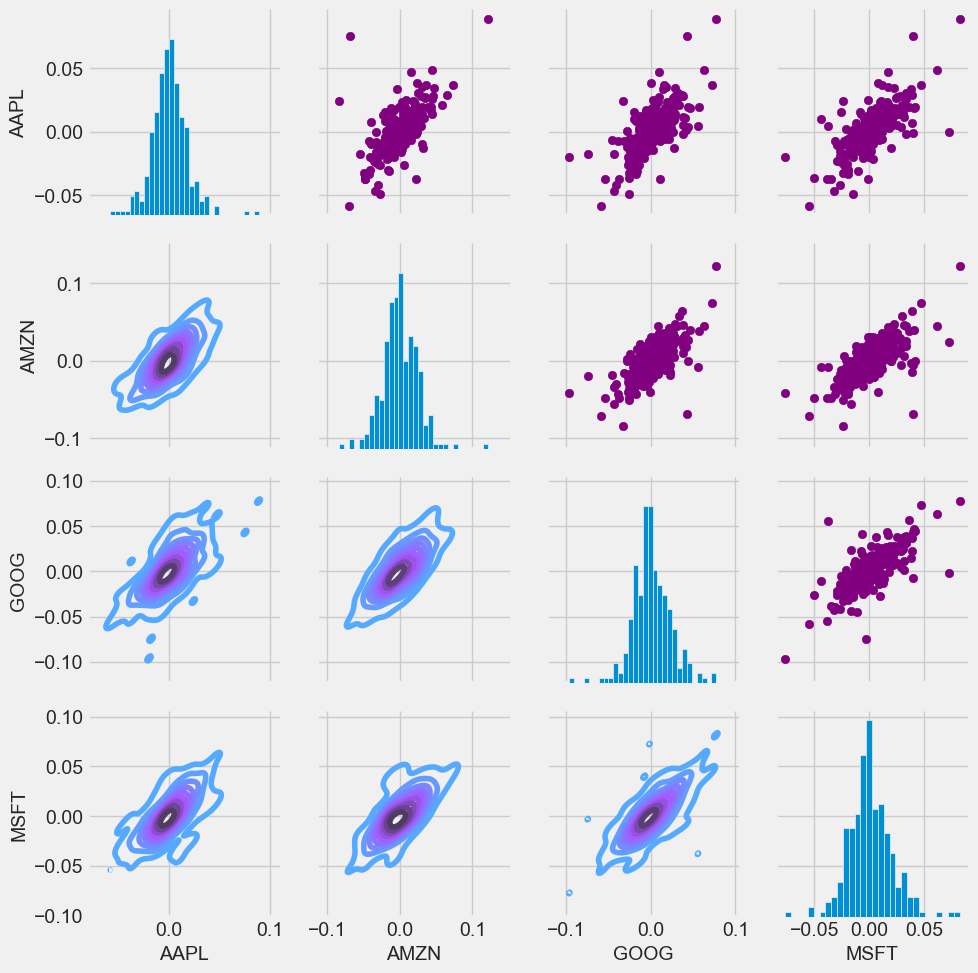

In [30]:
# [The correlation graph of stock's daily returns]
# We can also use pairgrid

# Setting up our figure by naming it returns_fig, calling PairPLot on the DataFrame
return_fig = sns.PairGrid(returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

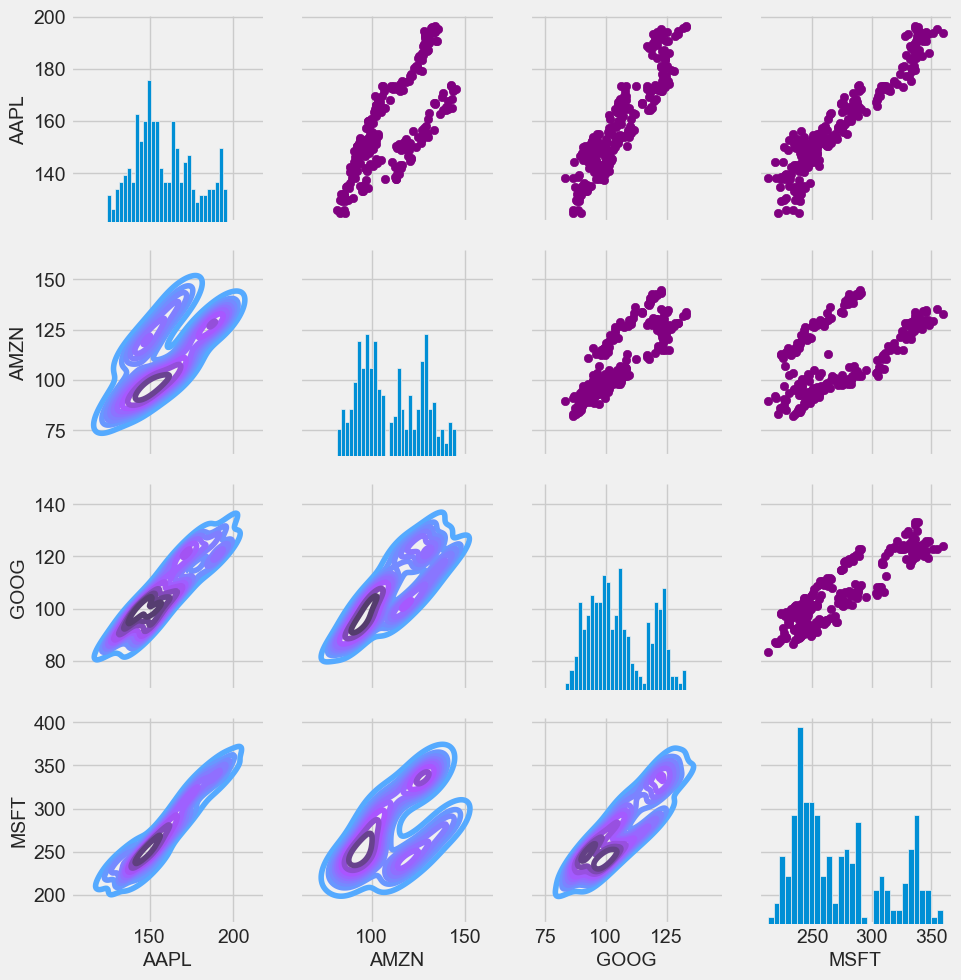

In [31]:
# [The correlation graph of Closing price]

# Setting up our figure by naming it returns_fig, calling PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

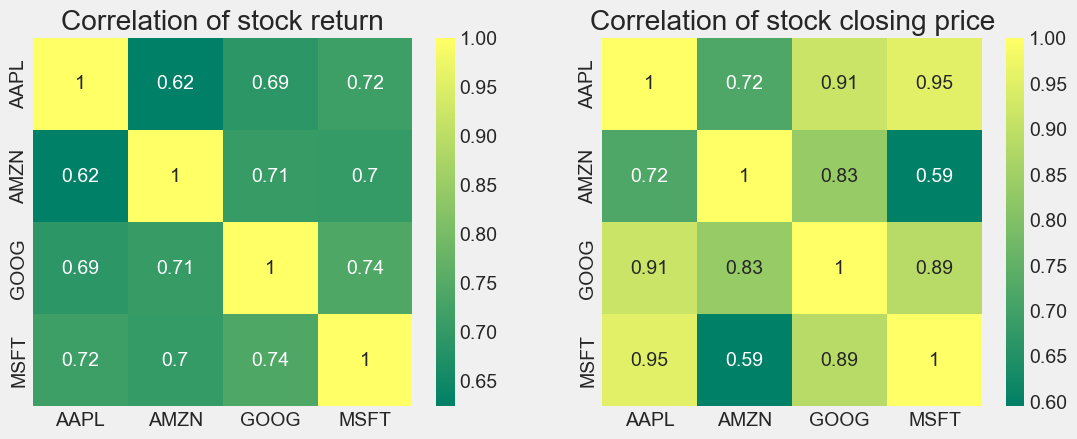

In [32]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(returns.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

- From the above plot we observe that Google and Microsoft are having the strongest relationship as correlation of 
  daily stock returns.
- And we also observe that Apple and Microsoft are having the strongest relationship as correlation of 
  stock closing price.     

3.6 Value to be put at risk by investing in a particular stock

- One of the most basic ways using the information to be gathered on daily percentage returns is by comparing 
  the expected return with the standard deviation of the daily returns.

In [33]:
rets = returns.dropna()
rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-04,-0.001926,0.021861,0.000758,0.004177
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002903,-0.009872,-0.000677,-0.009155
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024301
...,...,...,...,...
2023-07-27,-0.006581,0.000780,0.001620,-0.020872
2023-07-28,0.013508,0.030877,0.024178,0.023131
2023-07-31,0.003166,0.011119,0.000752,-0.007241


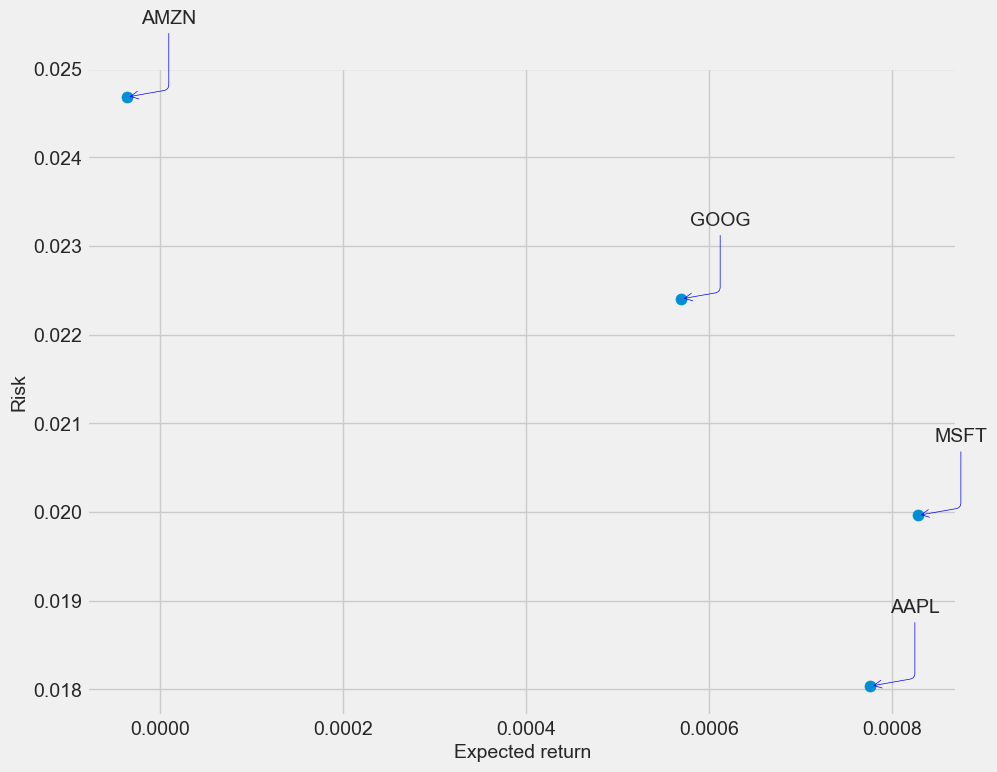

In [34]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='angle,angleA=-90,angleB=10,rad=5'))

3.6.1 Value at Risk using the Monte Carlo method

- Using the Monte Carlo to run many trials with random market conditions, 
  then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations
  to establish how risky the stock is.


In [35]:
# Setting up our time horizon
days = 365

# Now our delta
dt = 1/days

# Grabing our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOG']

# Grabing the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOG']

In [36]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Defining a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schoking and Drifting
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Running price array for number of days
    for x in range(1,days):
        
        # Calculating Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculating Drift
        drift[x] = mu * dt
        # Calculating Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [37]:
# Putting above function to work
# For Google Stock - GOOGL
GOOG

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-08-03,116.339996,119.419998,116.150002,118.779999,118.779999,25302800,GOOGLE,NaN,NaN,NaN,NaN
2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700,GOOGLE,NaN,NaN,NaN,0.000758
2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15615700,GOOGLE,NaN,NaN,NaN,-0.005468
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100,GOOGLE,NaN,NaN,NaN,-0.000677
2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300,GOOGLE,NaN,NaN,NaN,-0.005417
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,131.800003,133.600006,129.179993,129.869995,129.869995,35931600,GOOGLE,124.165999,122.296500,122.9934,0.001620
2023-07-28,130.970001,134.070007,130.919998,133.009995,133.009995,26971000,GOOGLE,124.896999,122.946499,123.2518,0.024178
2023-07-31,133.009995,133.830002,132.130005,133.110001,133.110001,18381900,GOOGLE,125.701999,123.553499,123.4844,0.000752


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

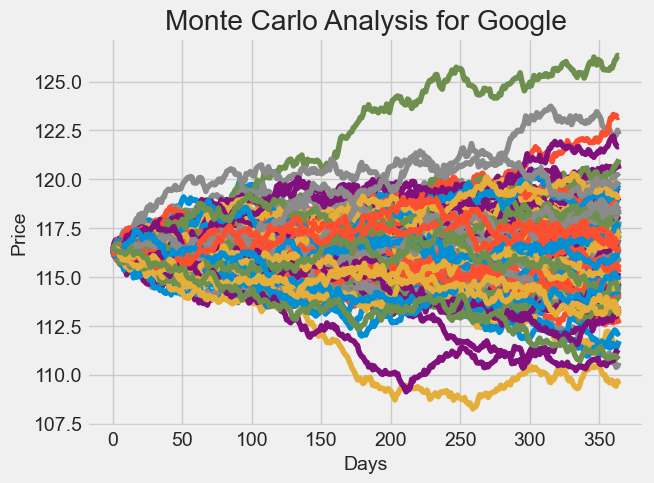

In [38]:
start_price = 116.339996

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [39]:
# For Amazon Stock - AMZN
AMZN

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800,AMAZON,NaN,NaN,NaN,NaN
2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,AMAZON,NaN,NaN,NaN,0.021861
2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50686900,AMAZON,NaN,NaN,NaN,-0.012415
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,AMAZON,NaN,NaN,NaN,-0.009872
2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700,AMAZON,NaN,NaN,NaN,-0.011333
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700,AMAZON,131.072000,130.436501,125.8372,0.000780
2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400,AMAZON,130.825002,130.652001,126.2134,0.030877
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500,AMAZON,130.837001,130.818000,126.5770,0.011119


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

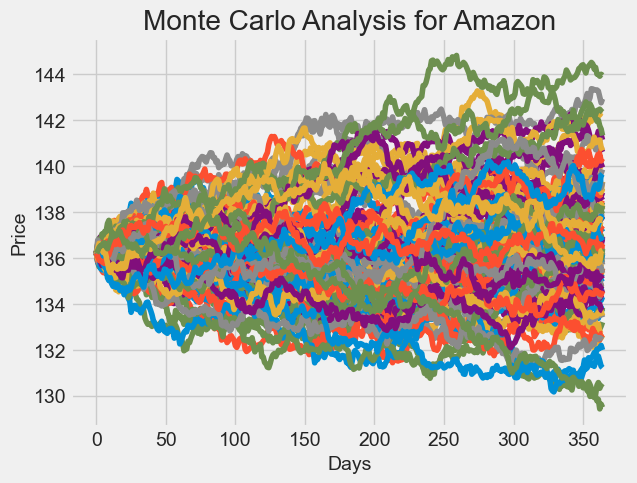

In [40]:
start_price = 136.210007

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

In [41]:
# For Apple Stock - AAPL
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500,APPLE,NaN,NaN,NaN,NaN
2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100,APPLE,NaN,NaN,NaN,-0.001926
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000,APPLE,NaN,NaN,NaN,-0.001389
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900,APPLE,NaN,NaN,NaN,-0.002903
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168777,63135500,APPLE,NaN,NaN,NaN,0.000303
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200,APPLE,193.267001,191.975500,184.8288,-0.006581
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400,APPLE,193.781001,192.287501,185.3040,0.013508
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100,APPLE,194.027000,192.411501,185.7792,0.003166


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

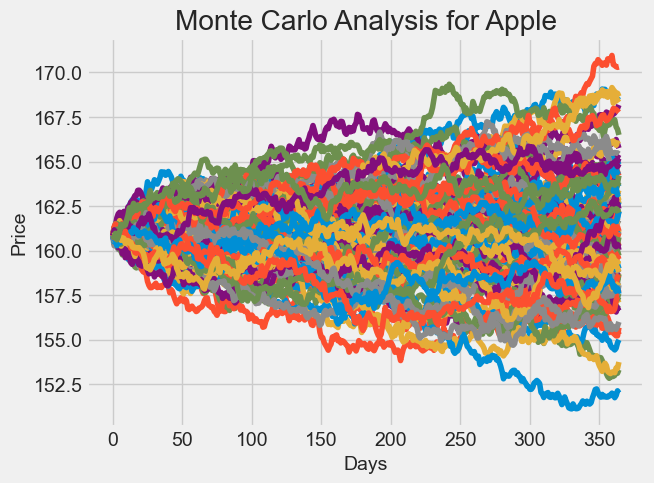

In [42]:
start_price = 160.839996

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [43]:
# For Microsoft Stock - MSFT
MSFT

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-08-03,276.760010,283.500000,276.609985,282.470001,279.765717,23518900,MICROSOFT,NaN,NaN,NaN,NaN
2022-08-04,281.799988,283.799988,280.170013,283.649994,280.934448,18098700,MICROSOFT,NaN,NaN,NaN,0.004178
2022-08-05,279.149994,283.649994,278.679993,282.910004,280.201538,16774600,MICROSOFT,NaN,NaN,NaN,-0.002609
2022-08-08,284.049988,285.920013,279.320007,280.320007,277.636292,18739200,MICROSOFT,NaN,NaN,NaN,-0.009155
2022-08-09,279.640015,283.079987,277.609985,282.299988,279.597321,23405200,MICROSOFT,NaN,NaN,NaN,0.007063
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300,MICROSOFT,346.075995,341.756996,334.361199,-0.020872
2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28484900,MICROSOFT,345.388995,341.922997,334.907399,0.023131
2023-07-31,336.920013,337.700012,333.359985,335.920013,335.920013,25446000,MICROSOFT,344.407996,341.691997,335.345799,-0.007241


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

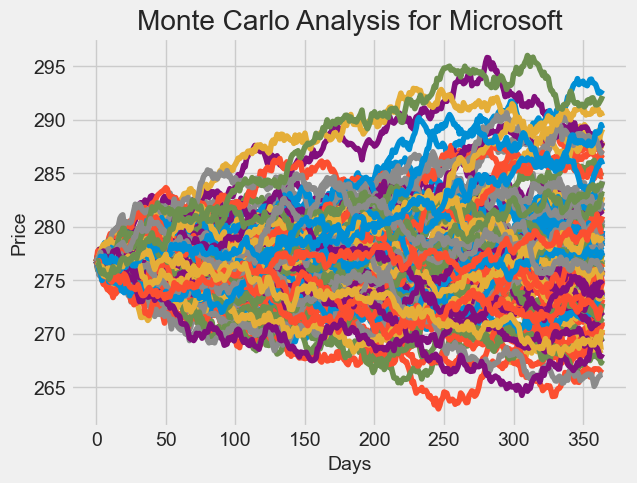

In [44]:
start_price = 276.760010

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

- Getting a histogram of the end results for a much larger run. 

In [45]:
# Starting with Google stock price
start_price = 116.339996

# Setting a large numebr of runs
runs = 10000

# Creatting an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Setting the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

- We have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile 
  to define our risk for this stock.

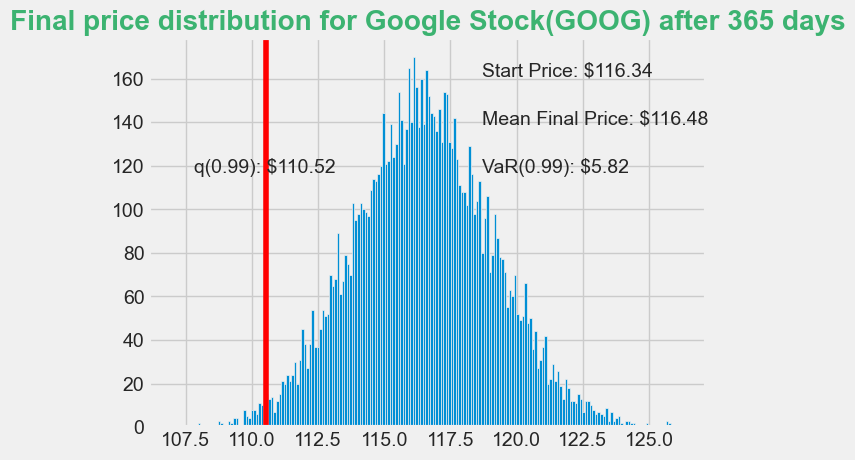

In [46]:
days = 365

# Defining q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plotting the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plotting a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='red')

# For Seeting up the title
s=f"Final price distribution for Google Stock(GOOG) after {days} days"

# For plot title
plt.title(s, weight='bold', color='MediumSeaGreen')

# Plotting the title
plt.show()

- We have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for
  the Google Stock(GOOG), which looks to be $5.79 for every investment of 116.339996 (The price of one initial Google Stock).

- This basically means for every initial Google stock you purchase you're putting about $5.79 at risk 99% of the time 
  from our Monte Carlo Simulation.

In [47]:
# For Amazon Stock Price
start_price = 136.210007

# Setting a large numebr of runs
runs = 10000

# Creating an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Setting the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

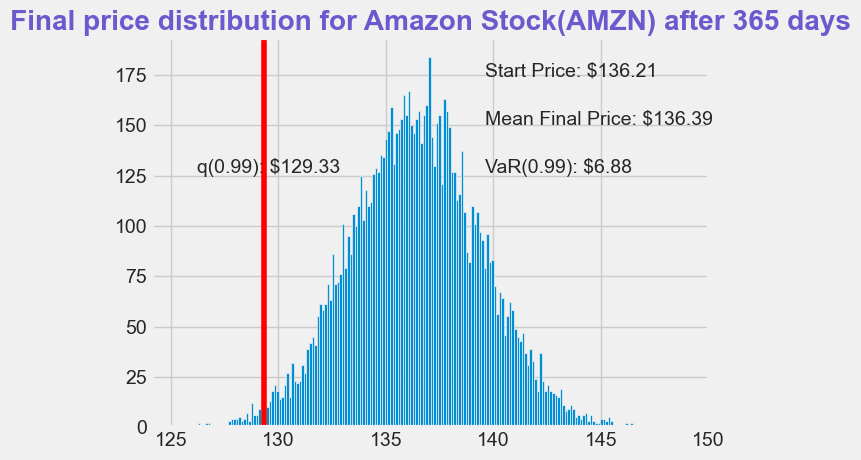

In [48]:
# Defining q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plotting the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plotting a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='red')

# For Seeting up the title
s=f"Final price distribution for Amazon Stock(AMZN) after {days} days"

# For plot title
plt.title(s, weight='bold', color='SlateBlue')

# Plotting the title
plt.show()

- This basically means for every initial Amazon stock you purchase you're putting about $6.68 at risk 99% of the time
  from our Monte Carlo Simulation.

In [49]:
# For Apple Stock Price
start_price = 160.839996

# Setting a large numebr of runs
runs = 10000

# Creating an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

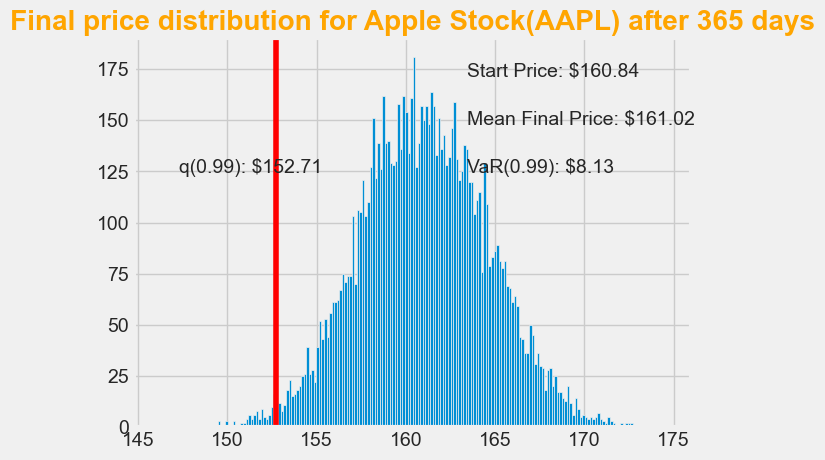

In [50]:
# Defining q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plotting the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plotting a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='red')

# For Seeting up the title
s=f"Final price distribution for Apple Stock(AAPL) after {days} days"

# For plot title
plt.title(s, weight='bold', color='Orange')

# Plotting the title
plt.show()

- This basically means for every initial Apple stock you purchase you're putting about $7.88 at risk 99% of 
  the time from our Monte Carlo Simulation.

In [51]:
# For Micosoft Stock Price
start_price = 276.760010

# Setting a large numebr of runs
runs = 10000

# Creating an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

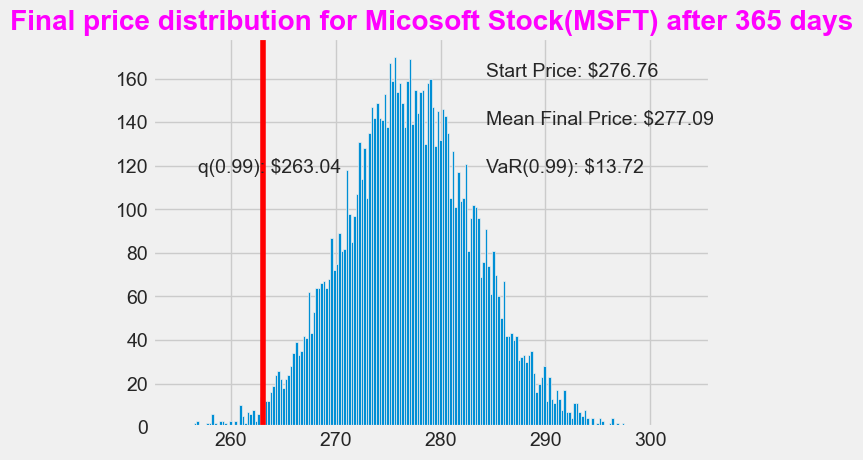

In [52]:
# Defining q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plotting the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plotting a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='red')

# For Seeting up the title
s=f"Final price distribution for Micosoft Stock(MSFT) after {days} days"

# For plot title
plt.title(s, weight='bold', color='fuchsia')

# Plotting the title
plt.show()

- This basically means for every initial Apple stock you purchase you're putting about $13.82 at risk 99% of 
  the time from our Monte Carlo Simulation.

3.7 Predicting the closing price stock price of the companies

In [53]:
# Getting the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482925,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689341,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821994,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801657,394024400
...,...,...,...,...,...,...
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100


In [54]:
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.366350,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.869194,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.092669,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.435873,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.140554,59706800
...,...,...,...,...,...,...
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300
2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28484900
2023-07-31,336.920013,337.700012,333.359985,335.920013,335.920013,25446000


In [55]:
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-07-27,131.800003,133.600006,129.179993,129.869995,129.869995,35931600
2023-07-28,130.970001,134.070007,130.919998,133.009995,133.009995,26971000
2023-07-31,133.009995,133.830002,132.130005,133.110001,133.110001,18381900


In [56]:
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700
2023-07-28,129.690002,133.009995,129.330002,132.210007,132.210007,46317400
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500


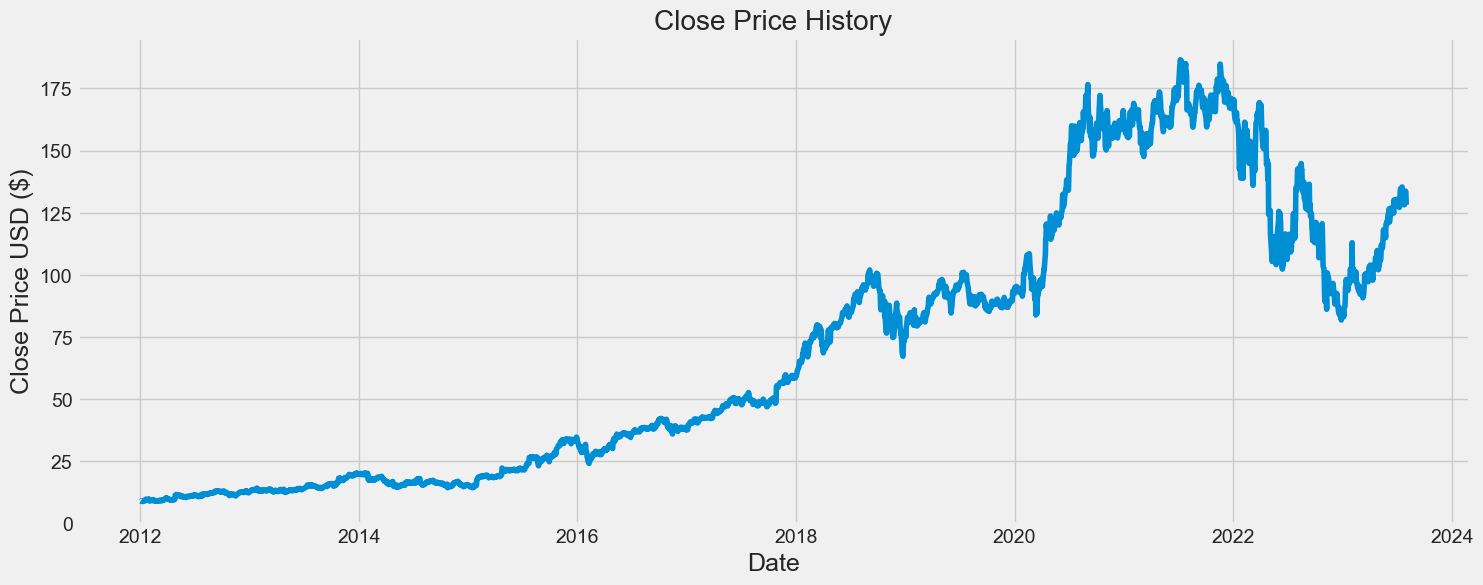

In [57]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [59]:
# Creating a new dataframe with only the Close column 
data = df.filter(['Close'])

# Converting the dataframe to a numpy array
dataset = data.values

# Getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2769

In [60]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [7.02484591e-01],
       [6.91290658e-01],
       [6.71715265e-01]])

# 4. Model Building

In [61]:
# Creating the training data set 
# Creating the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

(2709, 60, 1)

In [62]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install tensorflow --ignore-installed --user

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Using cached grpcio-1.56.2-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached wrapt-1.15.0-cp310-cp310-win_amd64.whl (36 kB)
  Using cached h5py-3.9.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\karan\\AppData\\Roaming\\Python\\Python310\\site-packages\\numpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.



In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model (Long Short Term Memory)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2709/2709 [==============================] - 46s 16ms/step - loss: 0.0016


In [65]:
# Creating the testing data set
# Creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Converting the data to a numpy array
x_test = np.array(x_test)

# Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 16ms/step


7.216374089718248

# 5. Predicting the Prices

C:\Users\karan\AppData\Local\Temp\ipykernel_39644\3125842770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


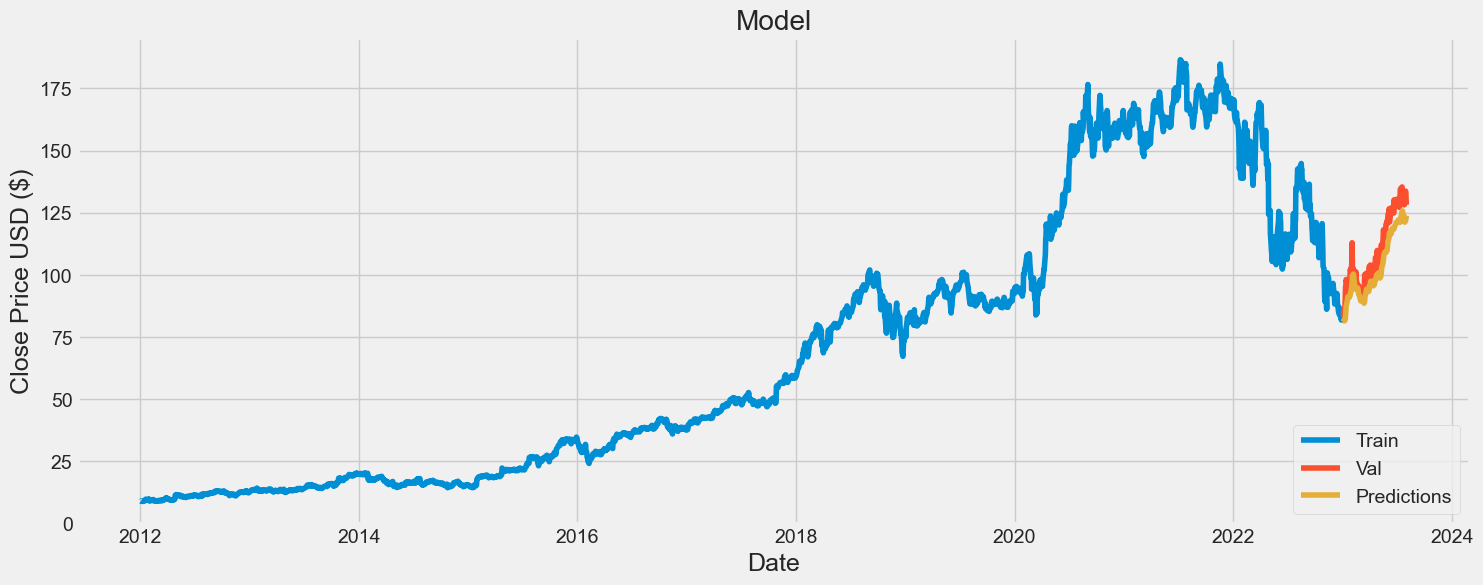

In [66]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [67]:
# Showing the validating and predicted prices
valid

,Close,Predictions
Date,,
2023-01-04,85.139999,81.131096
2023-01-05,83.120003,81.546783
2023-01-06,86.080002,81.435989
2023-01-09,87.360001,81.659767
2023-01-10,89.870003,82.217560
...,...,...
2023-07-27,128.250000,121.589523
2023-07-28,132.210007,121.200249
2023-07-31,133.679993,121.821808


- Here, from both the graph and table we can see that Closing price and Predicted price are almost close to each other.  

# END!